In [1]:
import sys
import os

import pandas as pd

scriptPath = os.path.realpath(os.path.dirname(sys.argv[0]))
os.chdir(scriptPath)
# Put the path here
sys.path.append("..")

from lib.converter.Settings import Settings
from lib.converter.Settings import Verbosity
from lib.converter.Settings import ProjectionScenario
from lib.converter.Quincy_fluxnet22_parser import Quincy_Fluxnet22_Parser

In [2]:
from lib.converter.Settings import Settings
from lib.converter.Settings import Verbosity
from lib.converter.Settings import ProjectionScenario
from lib.converter.Quincy_fluxnet22_parser import Quincy_Fluxnet22_Parser

set = Settings()
set.co2_concentration_file = '/Net/Groups/BSI/people/ppapastefanou/climate_aux/co2/GCP2023_co2_global.dat'
set.co2_dC13_file = '/Net/Groups/BSI/people/ppapastefanou/climate_aux/co2/delta13C_in_air_input4MIPs_GM_1850-2021_extrapolated.txt'
set.co2_DC14_file = '/Net/Groups/BSI/people/ppapastefanou/climate_aux/co2/Delta14C_in_air_input4MIPs_SHTRNH_1850-2021_extrapolated.txt'

set.root_ndep_path = "/Net/Groups/BSI/data/OCN/input/gridded/NDEP/CESM-CAM"
set.ndep_projection_scenario = ProjectionScenario.RCP585
set.root_pdep_path ="/Net/Groups/BSI/work/quincy/model/InputDataSources/P-DEP"

set.lithology_map_path = "/Net/Groups/BSI/data/datastructure_bgi_cpy/grid/Global/0d50_static/GLiM/v1_0/Data/GLim.720.360.nc"
set.soil_grid_database_path = "/Net/Groups/BSI/data/datastructure_bgi_cpy/grid/Global/0d10_static/soilgrids/v0_5_1/Data"
set.phosphorus_input_path = "/Net/Groups/BSI/data/datastructure_bgi_cpy/grid/Global/0d50_static/Phosphorous/v2014_06/Data"
set.qmax_file = "/Net/Groups/BSI/people/ppapastefanou/data/qmax_org_values_per_nwrb_category_20180515.csv"

set.verbosity = Verbosity.Info
set.root_output_path = "/Net/Groups/BSI/work_scratch/ppapastefanou/temp"
set.first_transient_forcing_year = 1901

root_flux_path = "/Net/Groups/BGI/work_1/scratch/fluxcom/sitecube_proc/model_files_20231129"

os.chdir('/Net/Groups/BSI/work_scratch/ppapastefanou/src/Quincy_Forcing_Generation/applications')

sites = pd.read_csv("Sitenames_and_PFTs.csv")['Sitename']
#sites = sites[1:4]
sites = ["AT-Neu"]

In [3]:
os.getcwd()

'/Net/Groups/BSI/work_scratch/ppapastefanou/src/Quincy_Forcing_Generation/applications'

In [4]:
from lib.base.Fluxnet22_Jake import Fluxnet2022_Jake

fnet = Fluxnet2022_Jake(rtpath=root_flux_path, sitename=sites[0])
fnet.Read_And_Parse_Time()

In [5]:
from lib.converter.Quincy_fluxnet22_forcing import Quincy_Fluxnet22_Forcing

In [6]:
qf = Quincy_Fluxnet22_Forcing(settings=set)
qf.Connect_to_fluxnet(fnet=fnet)
qf.Parse_forcing()

Read fluxnet forcing..Done! (0.1 sec.)
Adjusting for leap years..Done! (0.0 sec.)
Parsing fluxnet forcing..Done! (0.2 sec.)
Parsing CO2..Done! (0.1 sec.)
Parsing dCO2-13 and 14..Done! (0.1 sec.)
Parsing P deposition..Done! (0.0 sec.)
Parsing N deposition..Done! (1.0 sec.)
Testing for missing values..Done! (0.2 sec.)


In [7]:
fnet.df


,date,SWdown,LWdown,Tair,Precip,Qair,Psurf,Wind
0,1990-01-01 00:15:00,0.056567,188.936816,263.304637,0.0,0.001678,91034.701850,0.518166
1,1990-01-01 00:45:00,0.056567,188.936816,263.304637,0.0,0.001678,91034.701850,0.518166
2,1990-01-01 01:15:00,0.056567,193.547802,263.185942,0.0,0.001730,91002.831969,0.511515
3,1990-01-01 01:45:00,0.056567,193.547802,263.185942,0.0,0.001730,91002.831969,0.511515
4,1990-01-01 02:15:00,0.056567,192.469928,263.079455,0.0,0.001772,90967.436438,0.462288
...,...,...,...,...,...,...,...,...
561019,2021-12-31 21:45:00,0.056567,221.895405,277.355107,0.0,0.004562,91683.111053,0.600978
561020,2021-12-31 22:15:00,0.056567,221.625875,277.247783,0.0,0.004549,91719.266972,0.544857
561021,2021-12-31 22:45:00,0.056567,221.625875,277.247783,0.0,0.004549,91719.266972,0.544857
561022,2021-12-31 23:15:00,0.056567,221.915342,277.464451,0.0,0.004534,91731.521472,0.519854


In [8]:
fnet.df.set_index('date', inplace = True)

In [9]:
def avg_timerange( df, freq):
    dfs= df.groupby(pd.Grouper(freq=freq)).mean().reset_index()
    return dfs

In [14]:
fnet.df

,SWdown,LWdown,Tair,Precip,Qair,Psurf,Wind
date,,,,,,,
1990-01-01 00:15:00,0.056567,188.936816,263.304637,0.0,0.001678,91034.701850,0.518166
1990-01-01 00:45:00,0.056567,188.936816,263.304637,0.0,0.001678,91034.701850,0.518166
1990-01-01 01:15:00,0.056567,193.547802,263.185942,0.0,0.001730,91002.831969,0.511515
1990-01-01 01:45:00,0.056567,193.547802,263.185942,0.0,0.001730,91002.831969,0.511515
1990-01-01 02:15:00,0.056567,192.469928,263.079455,0.0,0.001772,90967.436438,0.462288
...,...,...,...,...,...,...,...
2021-12-31 21:45:00,0.056567,221.895405,277.355107,0.0,0.004562,91683.111053,0.600978
2021-12-31 22:15:00,0.056567,221.625875,277.247783,0.0,0.004549,91719.266972,0.544857
2021-12-31 22:45:00,0.056567,221.625875,277.247783,0.0,0.004549,91719.266972,0.544857


In [28]:
fs = avg_timerange(fnet.df, '30min')

In [29]:
fs

,date,SWdown,LWdown,Tair,Precip,Qair,Psurf,Wind
0,1990-01-01 00:00:00,0.056567,188.936816,263.304637,0.0,0.001678,91034.701850,0.518166
1,1990-01-01 00:30:00,0.056567,188.936816,263.304637,0.0,0.001678,91034.701850,0.518166
2,1990-01-01 01:00:00,0.056567,193.547802,263.185942,0.0,0.001730,91002.831969,0.511515
3,1990-01-01 01:30:00,0.056567,193.547802,263.185942,0.0,0.001730,91002.831969,0.511515
4,1990-01-01 02:00:00,0.056567,192.469928,263.079455,0.0,0.001772,90967.436438,0.462288
...,...,...,...,...,...,...,...,...
561019,2021-12-31 21:30:00,0.056567,221.895405,277.355107,0.0,0.004562,91683.111053,0.600978
561020,2021-12-31 22:00:00,0.056567,221.625875,277.247783,0.0,0.004549,91719.266972,0.544857
561021,2021-12-31 22:30:00,0.056567,221.625875,277.247783,0.0,0.004549,91719.266972,0.544857
561022,2021-12-31 23:00:00,0.056567,221.915342,277.464451,0.0,0.004534,91731.521472,0.519854


In [26]:
fs['Tair'].values

array([278.92145826, 278.44704901, 279.43211043, 279.10110335,
       280.40221004, 279.14137162, 278.66820989, 279.77445705,
       279.21634836, 279.28368226, 279.81324781, 279.41313863,
       280.94982242, 280.32473391, 279.53436968, 278.77953483,
       279.93474224, 280.41865811, 280.2401903 , 279.92433253,
       279.20185103, 280.20323265, 279.84378333, 280.01218429,
       280.84568929, 280.87480139, 280.45727526, 280.27389276,
       281.13866884, 280.71583788, 280.7232962 , 279.87873986])

In [12]:
import matplotlib.pyplot as plt

In [19]:
fs.index

RangeIndex(start=0, stop=32, step=1)

In [20]:
fs.index

RangeIndex(start=0, stop=32, step=1)

In [21]:
[fs.index[i][0] for i in range(0,fs.index.shape[0], 4)]

TypeError: 'int' object is not subscriptable

NameError: name 'fs' is not defined

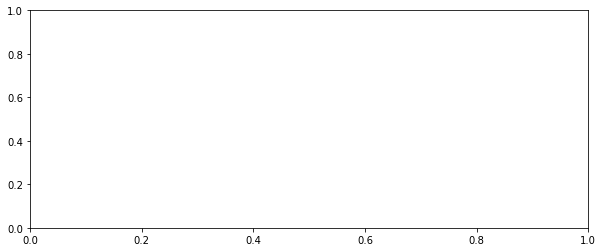

In [13]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
ax.scatter(range(0, fs.values.shape[0]),fs['SWdown'].values)
ax.set_xticks(range(0 , fs.values.shape[0], 4));
#ax.set_xticklabels([fs.index[i][0] for i in range(0,fs.index.shape[0], 4)]);


In [ ]:
fs.values.shape[0]

In [ ]:
fs.index.size

In [25]:
def avg_timerange(df):
    dfs = df.groupby([df.index.hour]).mean()
    tx = pd.date_range('2000-01-01', periods=24, freq='h')
    return dfs, tx

In [26]:
fs, tx = avg_timerange(fnet.df)

In [30]:
fs['SWdown'].values.mean()

134.97730554254073

In [35]:
dh = pd.DataFrame(fs['SWdown'].values / fs['SWdown'].values.mean())

In [39]:
dh.to_csv("SW_monthly_rad.csv")

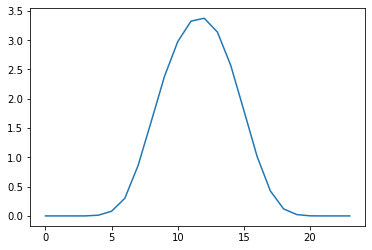

In [32]:
plt.plot(fs['SWdown'].values / fs['SWdown'].values.mean())

In [ ]:
qf.DataFrame['doy'].describe()

In [ ]:
qf.DataFrame['doy'].astype(int).describe()

In [ ]:
qf.DataFrame['year'].astype(int).describe()

In [ ]:
3 +4

In [2]:
exit